## Importing libraries

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import plot_model

## Defining image dimensions

In [2]:
image_height = 200
image_width = 200

## Data directory

In [3]:
# Define directories
train_dir = "D:/ASL/train"
val_dir = "D:/ASL/val"
test_dir = "D:/ASL/test"

In [4]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,  # shear range
    zoom_range=0.1,  #  zoom range
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Model Definition
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),  
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),  
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),  
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),  
    Dropout(0.5),
    Dense(36, activation='softmax')
])

In [6]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the Model
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=16,  # Reducing batch size
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=16,  # Reducing batch size
    class_mode='categorical'
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 16,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 16
)

Found 1988 images belonging to 36 classes.
Found 245 images belonging to 36 classes.
Epoch 1/10


124/124 [==============================] - 74s 565ms/step - loss: 3.2211 - accuracy: 0.1217 - val_loss: 2.0672 - val_accuracy: 0.4208
Epoch 2/10
124/124 [==============================] - 69s 558ms/step - loss: 2.4040 - accuracy: 0.2728 - val_loss: 1.3871 - val_accuracy: 0.5917
Epoch 3/10
124/124 [==============================] - 70s 561ms/step - loss: 1.8950 - accuracy: 0.3950 - val_loss: 0.9699 - val_accuracy: 0.7292
Epoch 4/10
124/124 [==============================] - 70s 562ms/step - loss: 1.6516 - accuracy: 0.4620 - val_loss: 0.8096 - val_accuracy: 0.7792
Epoch 5/10
124/124 [==============================] - 69s 559ms/step - loss: 1.3965 - accuracy: 0.5238 - val_loss: 0.6073 - val_accuracy: 0.8583
Epoch 6/10
124/124 [==============================] - 70s 561ms/step - loss: 1.3223 - accuracy: 0.5456 - val_loss: 0.5157 - val_accuracy: 0.8708
Epoch 7/10
124/124 [=======================

In [8]:
# Evaluate the Model
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=16,  # Reducing batch size
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

Found 252 images belonging to 36 classes.
16/16 [==============================] - 2s 141ms/step - loss: 0.3488 - accuracy: 0.8810
Test Accuracy: 0.8809523582458496


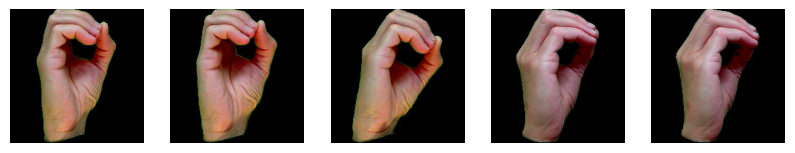

In [7]:
# Sample Images
sample_images_dir = os.path.join(train_dir, os.listdir(train_dir)[0])
sample_images = os.listdir(sample_images_dir)[:5]

plt.figure(figsize=(10, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_images_dir, img_name)
    img = load_img(img_path, target_size=(image_height, image_width))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

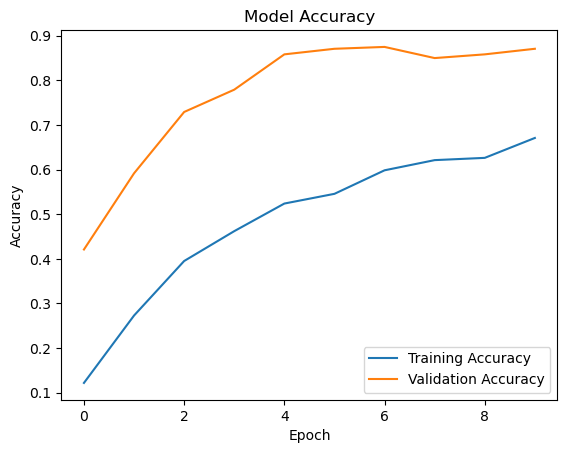

In [16]:
# Plot Model Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()